# Задача №22 - Скорость сходимости метода Ньютона; по предмету: Системы Компьютерной Математики 

## Выполнил: Смирнов Леонид (группа 3821Б1ПР1)

### *Постановка задачи:*
Применить метод Ньютона ***scipy.optimize.newton*** к решению каждого из уравнений:

$$
(x - 1)^2 = 0 \quad и \quad e^{2x} - 2e^{x} + 1 = 0
$$

Показать экспериментально (построить графики зависимости ошибки от номера шага), что итерации сходятся линейно, а не квадратично. Попробовать доказать это теоретически.

# Решение:
## Уравнение 1: $ (x - 1)^2 = 0 $
 - Уравнение $ (x - 1)^2 = 0 $ имеет решение при **х = 1:**  $ (1 - 1)^2 = 0 $
 - 1-ая производная функции: $ (x - 1)^2 $ = $ ((x - 1)^2)^{'} $ = $ 2(x - 1) $
 - 2-ая производная функции: $ (x - 1)^2 $ = $ ((x - 1)^2)^{''} $ = 2

## Уравнение 2: $ e^{2x} - 2e^{x} + 1 = 0 $
 - Уравнение $ e^{2x} - 2e^{x} + 1 = 0 $ имеет решение при **х = 0:**  $ e^{0} - 2e^{0} + 1 = 1 - 2 + 1 = 0 $
 - 1-ая производная функции: $ e^{2x} - 2e^{x} + 1 $ = $ (e^{2x} - 2e^{x} + 1)^{'} $ = $ 2e^x(e^x - 1) $
 - 2-ая производная функции: $ e^{2x} - 2e^{x} + 1 $ = $ (e^{2x} - 2e^{x} + 1)^{''} $ = $ 2e^x(2e^x - 1) $

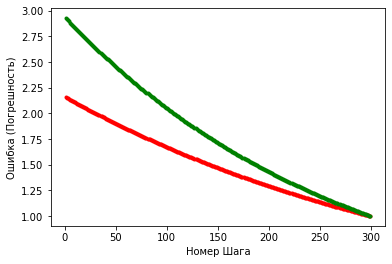

In [21]:
# Подключение библиотек
import math
import numpy as numpy                
import matplotlib.pyplot as plt   
from scipy import optimize
%matplotlib inline


plt.xlabel('Номер Шага')           # Название оси абсцисс у графика 
plt.ylabel('Ошибка (Погрешность)') # Название оси ординат у графика


# 1 Функция f(x) = (х - 1)^2 
def f1(x): 
    return (x-1)**2 

f1x = lambda x: 2*(x-1) # 1-ая производная функции f1
f1xx = lambda x: 2      # 2-ая производная функции f1

x1=[]                                       # пустой массив значений аргумента х
number_of_iterations = numpy.arange(1, 300) # массив количества итераций 

# Цикл
for i in number_of_iterations: 
    # Использование Метода "scipy.optimize.newton"
    root = optimize.newton(f1, 2, maxiter=i, disp=0, fprime = f1x, fprime2 = f1xx)
    
    # Параметры Метода "scipy.optimize.newton":
    # 1) func = f1 (Функция, которая вызывается)
    # 2) X_o = 2 (Начальная оценка "Нуля")
    # 3) maxiter - максимальное количество итераций
    # 4) disp(type of bool) = 0 
    # 5) fprime - 1-ая производная функции f1
    # 6) fprime2 - 2-ая производная функции f1
    
    #Корень данного уравнения вида: (х - 1)^2 = 0 равен 1. Следовательно его нужно вычесть для получения погрешности!!!
    root = root - 1  
    
    # Добавление
    x1.append(root) 
    
# Возвращаем одномерный массив (start, stop, num of elements)
y = numpy.logspace(x1[0], x1[len(x1)-1], num=len(x1))

# Построение графика из полученных значений
plt.plot(number_of_iterations, y, '.', color = 'red', linewidth = 3)
pass



#2 Функция f(x) = e^2x - 2e^x + 1 = (e^x - 1)^2
def f2(x): 
    return (math.exp(x)-1)**2

f2x = lambda x: 2*math.exp(x) * (math.exp(x) - 1)    # 1-ая производная функции f2
f2xx = lambda x: 2*math.exp(x) * (2*math.exp(x) - 1) # 2-ая производная функции f2

x2 = []                                    # пустой массив значений аргумента х
number_of_iterations = numpy.arange(1,300) # массив количества итераций   

# Цикл
for i in number_of_iterations: 
    # Использование Метода "scipy.optimize.newton"
    root = optimize.newton(f2,1, maxiter=i,disp=0, fprime = f2x, fprime2 = f2xx)
    
    # Параметры Метода "scipy.optimize.newton":
    # 1) func = f2 (Функция, которая вызывается)
    # 2) X_o = 1 (Начальная оценка "Нуля")
    # 3) maxiter - максимальное количество итераций
    # 4) disp(type of bool) = 0 
    # 5) fprime - 1-ая производная функции f2
    # 6) fprime2 - 2-ая производная функции f2
    
    # Корень данного уравнения вида: (e^x - 1)^2 = 0 равен 0. Следовательно его и вычитать не нужно!!!
    # Добавление
    x2.append(root) 
    
# Возвращаем одномерный массив (start, stop, num of elements)
y=numpy.logspace(x2[0],x2[len(x2)-1],num=len(x2))

plt.plot(number_of_iterations,y,'.', color = 'green', linewidth = 3)
pass

**Вывод 1:** После применения метода: **"scipy.optimize.newton"** к решению каждого из следующих уравнений вида: $ (x - 1)^2 = 0 $ и $ e^{2x} - 2e^{x} + 1 = 0 $ or $ (e^x - 1)^2 = 0 $. 
При построении графиков (зависимости ошибок(погрешностей) от номера шага) для полученных функций видно, что как для первой функции: $ (x - 1)^2 = 0 $, так и для второй функции: $ (e^x - 1)^2 = 0 $, Скорость Сходимости есть Линейная, то есть итерации сходятся линейно, а не квадратично!

# Теоритическое Доказательство
## Теорема о сходимости Метода Ньютона (Описание Метода):
Чтобы численно решить уравнение $f(x) = 0$ методом простой итерации, то его необходимо привести к эквивалентному уравнению: $ x = \varphi(x) $, где $ \varphi(x) $ - сжимающее отображение.

Для лучшей сходимости метода в точке очередного приближения $ x^{*} $ должно выполняться условие $ \varphi^{'}(x^{*}) = 0 $;
Решение данного уравнения ищут в виде: $ \varphi(x) = x + \alpha(x)f(x) $, тогда:

$ \varphi^{'}(x^{*}) = 1 + \alpha^{'}(x^{*})f(x^{*}) + \alpha(x^{*})f^{'}(x^{*}) = 0 $

В предположении, что точка приближения «достаточно близка» к корню $ x^{-} $ и что заданная функция непрерывна; окончательная формула для $ \alpha(x) $:

$ \alpha(x) = - \frac{1}{f^{'}(x)} $

C учетом этого функция $ \varphi(х) $ определяется:
$$ \varphi(x) = x - \frac{f(x)}{f^{'}(x)} $$
где $f(x)$ - исходная функция, а $f^{'}(x)$ - Первая производная этой функции


В результате получается функция, которая показывает(определяет) сходимоть метода:

## Метод Ньютона для первого уравнения: 
***Функция(1):*** $ f_1(x) = (x - 1)^2 $

***Первая Производная Функции(1):*** $ f_1^{'}(x) = ((x-1)^2)^{'} = 2(x - 1) $

***Общий вид:***
$$ \varphi(x) = x - \frac{f(x)}{f^{'}(x)} $$

$$ \varphi_1(x)= x - \frac{f_1(x)}{f_1^{'}(x)} = x - \frac{(x - 1)^2}{2(x - 1)} = \frac{2x(x - 1) - (x - 1)^2}{2(x - 1)} = 
\frac{(x - 1)(2x - (x - 1))}{2(x - 1)} = \frac{(x - 1)}{2}$$

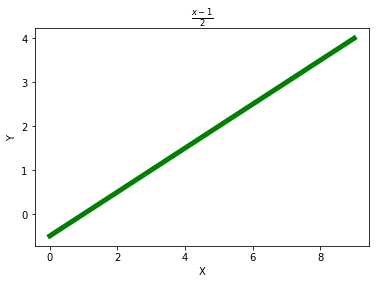

In [22]:
# Подключение библиотек
import numpy as np 
import math
import matplotlib.pyplot as plt
%matplotlib inline

y=[]               # Пустой массив значений аргумента y
x=np.arange(0,10)  # Массив количества итераций

def f(x): 
    return (x-1)/2 # Функция(1)

for x1 in x:
    y.append(f(x1))
    
plt.title(r'$ \frac{x-1}{2} $') # Заголовок Графика Функции
plt.xlabel('X')                 # Название оси абсцисс у графика 
plt.ylabel('Y')                 # Название оси ординат у графика

plt.plot(x,y,'-', color = 'green', linewidth = 5) # График
pass

## Метод Ньютона для второго уравнения:  

***Функция(2):*** $ f_2(x) = e^{2x} - 2e^{x} + 1 = (e^x - 1)^2 $

***Первая Производная Функции(2):*** $ f_2^{'}(x) = (e^{2x} - 2e^{x} + 1)^{'} = 2e^{2x} - 2e^x = 2e^x(e^x - 1) $

***Общий вид:***
$$ \varphi(x) = x - \frac{f(x)}{f^{'}(x)} $$

$$ \varphi_2(x) = x - \frac{f_2(x)}{f_2^{'}(x)}= x - \frac{(e^x - 1)^2}{2e^x(e^x - 1)} = x - \frac{e^x - 1}{2e^x} $$

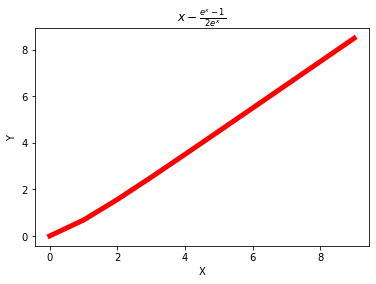

In [23]:
# Подключение библиотек
import numpy as np 
import math
import matplotlib.pyplot as plt
%matplotlib inline

y=[]              # Пустой массив значений аргумента y
x=np.arange(0,10) # Массив количества итераций

def f(x): 
    return x - (math.exp(x)-1)/(2*math.exp(x)) # Функция(2)

for x1 in x:
    y.append(f(x1))
    
plt.title(r'$ x - \frac{e^x - 1}{2e^x} $') # Заголовок Графика Функции
plt.xlabel('X')                            # Название оси абсцисс у графика 
plt.ylabel('Y')                            # Название оси ординат у графика 

plt.plot(x,y,'-', color = 'red', linewidth = 5) # График
pass

**Вывод 2:** Входе рассмотрения 2х функций и применения к ним метода Ньютона, После построения полученных результатов наблюдается, что функции являются линейными, что соответственно означает, что у двух исходных функций скорость сходимости - ЛИНЕЙНАЯ!!!

**Общий Вывод:** В результате 2х проведенных работ: 1 - Эксперементального Доказательства Скорости Сходимости функций при помощи метода: **"scipy.optimize.newton"** к решению каждого из следующих уравнений вида: $ (x - 1)^2 = 0 $ и $ e^{2x} - 2e^{x} + 1 = 0 $ or $ (e^x - 1)^2 = 0 $.; 2 - Теоретического Доказательства, основанного на теореме "О Методе Ньютона" -> Получается, что Итерации двух данных функций Сходяться ЛИНЕЙНО!